In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import optuna
import seaborn as sns

In [202]:
import os

# working directory
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
    
# Printing CWD before
current_path()
 
# Select your current directory
os.chdir('/home/marina/Documents/master/ml in computational biology/Assignment_3_2023_datasets')
 
# Printing CWD after
current_path()

Current working directory before
/home/marina/Documents/master/ml in computational biology/Assignment_3_2023_datasets

Current working directory before
/home/marina/Documents/master/ml in computational biology/Assignment_3_2023_datasets



In [203]:
# Load the gene expression data from the CSV file. The user can select any of the datasets inside current directory

file ="dataset1.csv"
data = pd.read_csv(file)
np.shape(data)

(200, 201)

In [204]:
data

,Unnamed: 0,G1,G2,G3,G4,G5,G6,G7,G8,G9,...,G191,G192,G193,G194,G195,G196,G197,G198,G199,G200
0,C1,9.651052,8.124121,7.918863,10.115044,9.840778,8.321928,7.832890,9.962896,6.569856,...,0.000000,9.105909,9.375039,0.000000,10.064743,6.475733,9.060696,7.954196,9.219169,9.820179
1,C2,7.108524,7.199672,4.459432,8.842350,7.426265,4.700440,7.870365,9.038919,0.000000,...,5.285402,6.714246,9.764872,9.826548,8.326429,0.000000,8.731319,0.000000,0.000000,0.000000
2,C3,8.339850,8.098032,6.228819,9.463524,8.758223,0.000000,8.113742,9.868823,7.066089,...,7.011227,7.629357,9.946906,9.691744,9.238405,0.000000,9.243174,5.643856,8.060696,8.632995
3,C4,10.005625,7.022368,9.312883,9.068778,9.971544,8.689998,5.321928,8.974415,0.000000,...,9.459432,9.707359,0.000000,6.247928,9.856426,0.000000,7.554589,9.221587,9.273796,10.169925
4,C5,8.103288,7.832890,6.491853,9.507795,0.000000,0.000000,8.000000,9.753217,6.820179,...,0.000000,7.761551,10.156083,0.000000,9.238405,8.511753,8.784635,5.523562,8.199672,8.665336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,C196,9.744834,6.066089,8.867279,8.344296,9.487840,0.000000,3.584963,0.000000,3.584963,...,9.394463,0.000000,6.714246,4.700440,9.398744,2.000000,6.614710,9.057992,8.748193,9.786270
196,C197,10.026523,0.000000,9.303781,9.079485,10.029287,8.784635,4.906891,8.912889,4.807355,...,9.715962,9.807355,7.774787,5.781360,9.818582,2.584963,7.409391,9.564149,9.245553,10.304922
197,C198,0.000000,0.000000,6.108524,9.405141,8.467606,6.108524,7.960002,9.710806,6.741467,...,0.000000,7.787903,0.000000,9.946906,9.233620,8.857981,9.174926,5.459432,7.965784,8.361944
198,C199,5.357552,6.303781,3.459432,7.507795,6.044394,2.584963,0.000000,0.000000,6.087463,...,3.807355,5.209453,9.625709,9.667112,6.491853,0.000000,7.179909,1.000000,5.554589,5.044394


We observe that our data consists of a matrix with rows repressenting the individual cells, columns representing the expressed genes and values representing the gene expressions of each cell

In [205]:
# Extract the gene names and cell IDs
genes = data.columns[1:]
cells = data.iloc[:, 0]

In [206]:
len(genes),len(cells)

(200, 200)

In [207]:
# Extract the expression values
expressions = data.iloc[:, 1:].values.T

In [208]:
len(expressions)

200

In [209]:
expressions.min(axis=1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [210]:
expressions.max(axis=1)

array([10.30720081,  8.55458885,  9.69522829, 10.11504365, 10.39016896,
        9.24555271,  8.25738784, 10.25738784,  7.4429435 , 10.83762793,
        7.78790256,  8.59991284,  9.22641219,  7.49984589, 10.2911707 ,
        9.16741815,  8.07146236,  9.97871046,  8.6329952 ,  9.857981  ,
        9.50382574,  8.69696753,  8.73131903, 10.12282799,  7.62935662,
        9.10590851, 10.68999797,  9.44708323,  9.3553511 ,  7.66533592,
       10.91064273, 10.90011206, 10.26209485,  9.25266543, 10.71080643,
       10.07414146,  9.05799172, 10.84549005,  7.0768156 ,  9.45738088,
        8.14974712,  9.03891899,  9.87958325,  9.93663794,  9.45943162,
        9.74986943,  8.02236781, 10.88722062, 10.24317398, 10.63026713,
        9.12928302, 10.71424552,  9.6183855 ,  8.05528244, 10.37286506,
       10.2179577 ,  9.87958325,  9.22400167,  7.85174904,  7.77478706,
       10.28655776,  7.169925  ,  8.08214904,  8.63662462, 10.07012094,
        9.27612441,  8.69696753,  9.52943055,  9.73301532, 10.16

## Preprosseing


In [211]:
# Scale the expression values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(expressions)
print(scaled_data)

[[ 0.71097649  0.13399739  0.35346162 ... -2.59009513 -0.08402664
  -0.06038023]
 [ 0.12893682  0.16383918  0.26907436 ... -2.59009513  0.21474837
   0.24765393]
 [ 0.05069596 -0.73331479 -0.38322545 ... -0.42216885 -0.68336475
  -1.9450926 ]
 ...
 [ 0.06416432 -2.19333132 -0.58735994 ... -0.65253307 -1.45993883
  -1.9450926 ]
 [ 0.54635003 -2.19333132  0.25604516 ...  0.23697599 -0.02181157
   0.03090489]
 [ 0.7754449  -2.19333132  0.45576056 ...  0.3775737  -0.18290733
   0.18480933]]


## Firstly we will perform PCA,t-SNE and UMAP just for visualization purposes on 2-D and 3-D so we select the number of components to be 2 and then  3 


## Visualization in 2D


In [212]:
# Perform Principal Component Analysis (PCA) with 2 components
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(scaled_data)

In [213]:
# Perform t-SNE with deafult parametes and 2 components
tsne = TSNE(n_components=2,random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

In [214]:
# Perform UMAP with with deafult parametes and 2 components
umap_result = umap.UMAP(n_components=2,n_neighbors=10,min_dist=0.1,spread=1.0).fit_transform(scaled_data)

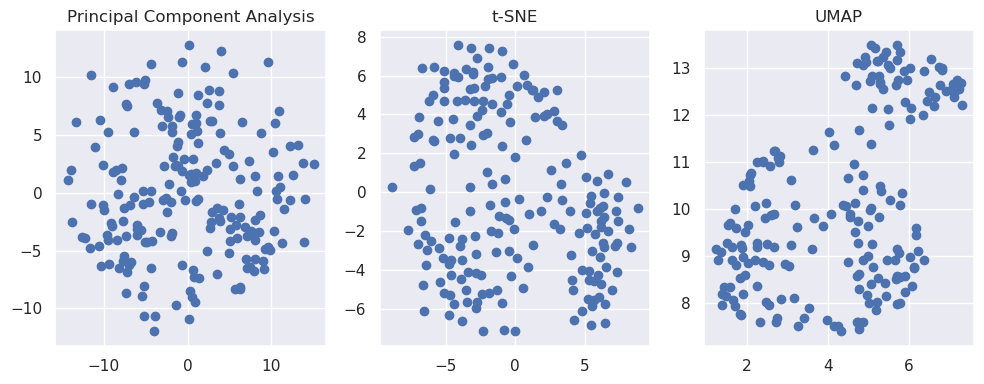

In [215]:
# Plot the results
plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('Principal Component Analysis')

plt.subplot(132)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE')

plt.subplot(133)
plt.scatter(umap_result[:, 0], umap_result[:, 1])
plt.title('UMAP')

plt.tight_layout()
plt.show()

## Visualization in 3D

In [216]:
# Perform Principal Component Analysis (PCA) with 2 components
pca = PCA(n_components=3, random_state=42)
pca_result = pca.fit_transform(scaled_data)

In [217]:
# Perform t-SNE with deafult parametes and 2 components
tsne = TSNE(n_components=3,random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

In [218]:
# Perform UMAP with with deafult parametes and 2 components
umap_result = umap.UMAP(n_components=3,n_neighbors=10,min_dist=0.1,spread=1.0).fit_transform(scaled_data)

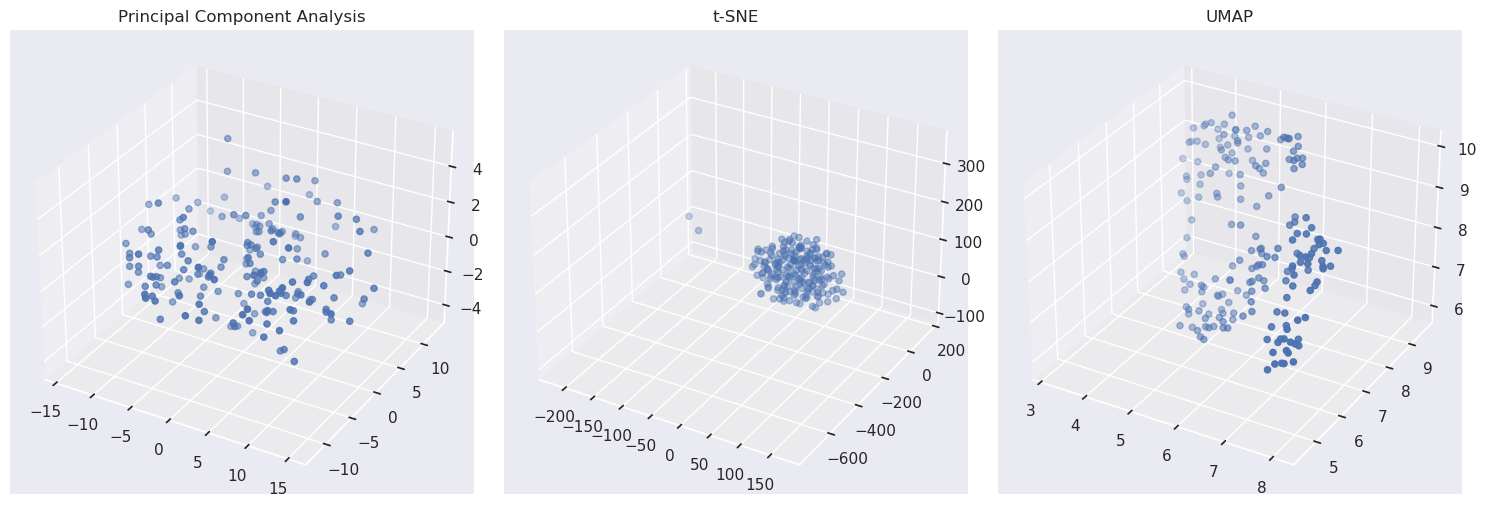

In [219]:
from mpl_toolkits.mplot3d import Axes3D


# Set the style
sns.set(style='darkgrid')

# Create a figure object and specify the subplot layout
fig = plt.figure(figsize=(15, 5))

# Create the subplots
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# Plot the scatter plots
scatter1 = ax1.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])
scatter2 = ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2])
scatter3 = ax3.scatter(umap_result[:, 0], umap_result[:, 1], umap_result[:, 2])

# Set titles for the subplots
ax1.set_title('Principal Component Analysis')
ax2.set_title('t-SNE')
ax3.set_title('UMAP')

# Add labels if needed
'''
ax1.set_xlabel('Dimension 1')
ax1.set_ylabel('Dimension 2')
ax1.set_zlabel('Dimension 3')
ax2.set_xlabel('Dimension 1')
ax2.set_ylabel('Dimension 2')
ax2.set_zlabel('Dimension 3')
ax3.set_xlabel('Dimension 1')
ax3.set_ylabel('Dimension 2')
ax3.set_zlabel('Dimension 3')
'''

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


Comparing the 2D and 3D plots we can certaintly gain more insight from the 2D one in which we can observe the forming of three distinct clusters.

The above experiment is done just to get an insight of the structure of the data and it cannot be generalized to any dataset. We can also use this information to try and optimize our dimensionality reduction methods further.

## Optimize umap using kmeans and optuna

If we want to optimise our dimensionality reduction we will need an evaluation  metric but the fact that we are working on an unsupervised learning problem gives us limited options. One option is to try to cluster the results of the dimensionality redution algorithm and use the sihlouette score as an evaluation metric. In the following blocks we will attempt to optimiseU UMAP using the sihlouette score of a k-means clustering algorithm as a metric.The k-means algorithm is fast and robust to outliers but the price to pay for its assets is that the number of clusters k have to be defined prior to running the clustering. In our case we don't have any idea about the physical number of clusters that the data may form in tha umap manifold representing them. Nevertheless we will make a rough guess based on the 2D representation we visualized on step one that the number of clusters will be 3.  

We have to note here that the number k has to be defined by the user based on domain specific knowledge or prior visualization steps.

In [220]:
from sklearn.metrics import silhouette_score


In [221]:
from sklearn.cluster import KMeans

def perform_clustering(embeddings):
    kmeans = KMeans(n_clusters=3)  # Specify the desired number of clusters
    clustering_labels = kmeans.fit_predict(embeddings)
    return clustering_labels


In [222]:
def objective(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 5, 15)
    min_dist = trial.suggest_float("min_dist", 0.1, 0.5)
    n_components = trial.suggest_int("n_components", 2, 5)
    
    if None in [n_neighbors, min_dist, n_components]:
        return -float("inf")
    
    umap_model = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components
    )
    embeddings = umap_model.fit_transform(scaled_data)

    # Perform clustering on UMAP embeddings
    # Here, you can use any clustering algorithm of your choice
    clustering_labels = perform_clustering(embeddings)
    

    # Calculate the silhouette score based on UMAP clustering
    silhouette_avg = silhouette_score(embeddings, clustering_labels)
    
    return silhouette_avg

In [223]:
study = optuna.create_study(direction='maximize')   

study.optimize(objective, n_trials=100)

best_params = study.best_params
best_score = study.best_value 

print('Best Parameters:', best_params)
print('Best Silouette Score:', best_score)

best_n_neighbors = best_params['n_neighbors']
best_min_dist = best_params['min_dist']
best_n_components=best_params["n_components"]





[I 2023-06-02 23:30:48,700] A new study created in memory with name: no-name-ba77110e-a7f0-4357-ada1-4a40da0d76c1
/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[I 2023-06-02 23:30:51,663] Trial 0 finished with value: 0.4546872675418854 and parameters: {'n_neighbors': 13, 'min_dist': 0.4959612870058462, 'n_components': 5}. Best is trial 0 with value: 0.4546872675418854.
/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[I 2023-06-02 23:30:53,521] Trial 1 finished with value: 0.48446419835090637 and parameters: {'n_neighbors': 5, 'min_dist': 0.2396360973314752, 'n_components': 5}. Best is trial 1 with value

/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[I 2023-06-02 23:31:32,366] Trial 18 finished with value: 0.5019580125808716 and parameters: {'n_neighbors': 9, 'min_dist': 0.204021997254962, 'n_components': 4}. Best is trial 12 with value: 0.5534709692001343.
/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[I 2023-06-02 23:31:34,213] Trial 19 finished with value: 0.5023152232170105 and parameters: {'n_neighbors': 6, 'min_dist': 0.1461555614461203, 'n_components': 3}. Best is trial 12 with value: 0.5534709692001343.
/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarn

/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[I 2023-06-02 23:32:06,158] Trial 36 finished with value: 0.5117076635360718 and parameters: {'n_neighbors': 10, 'min_dist': 0.23749226595853137, 'n_components': 5}. Best is trial 12 with value: 0.5534709692001343.
/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[I 2023-06-02 23:32:08,811] Trial 37 finished with value: 0.5367052555084229 and parameters: {'n_neighbors': 11, 'min_dist': 0.12184630465984592, 'n_components': 5}. Best is trial 12 with value: 0.5534709692001343.
/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: Futur

/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[I 2023-06-02 23:32:41,155] Trial 54 finished with value: 0.5347554683685303 and parameters: {'n_neighbors': 15, 'min_dist': 0.15098849764525207, 'n_components': 3}. Best is trial 50 with value: 0.5624057650566101.
/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[I 2023-06-02 23:32:42,943] Trial 55 finished with value: 0.5304500460624695 and parameters: {'n_neighbors': 13, 'min_dist': 0.14010485703619044, 'n_components': 2}. Best is trial 50 with value: 0.5624057650566101.
/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: Futur

/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[I 2023-06-02 23:33:17,418] Trial 72 finished with value: 0.5358214378356934 and parameters: {'n_neighbors': 15, 'min_dist': 0.13433744970096806, 'n_components': 2}. Best is trial 50 with value: 0.5624057650566101.
/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[I 2023-06-02 23:33:19,228] Trial 73 finished with value: 0.49584266543388367 and parameters: {'n_neighbors': 6, 'min_dist': 0.14465457422529246, 'n_components': 2}. Best is trial 50 with value: 0.5624057650566101.
/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: Futur

/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[I 2023-06-02 23:33:53,540] Trial 90 finished with value: 0.5123227834701538 and parameters: {'n_neighbors': 13, 'min_dist': 0.17949102116107446, 'n_components': 3}. Best is trial 50 with value: 0.5624057650566101.
/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[I 2023-06-02 23:33:55,400] Trial 91 finished with value: 0.5373842120170593 and parameters: {'n_neighbors': 14, 'min_dist': 0.10846749987962272, 'n_components': 2}. Best is trial 50 with value: 0.5624057650566101.
/home/marina/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: Futur

Best Parameters: {'n_neighbors': 13, 'min_dist': 0.11353321656271913, 'n_components': 3}
Best Silouette Score: 0.5624057650566101


In [224]:
umap_model = umap.UMAP(n_neighbors=best_n_neighbors, min_dist=best_min_dist,n_components=best_n_components, random_state=42)
embedding = umap_model.fit_transform(scaled_data)

In the following blocks we can visualize the our data in 2 and 3 dimensions although this visualization may not be enough to grasp the structure of the data if the resulting optimal number of components is greater than 3. Nevertheless we may get some insight of their structure. 

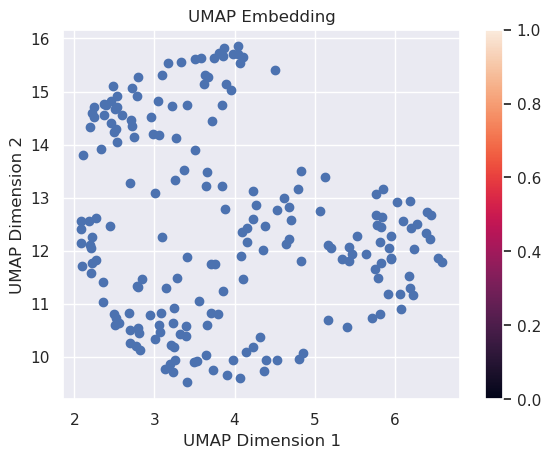

In [225]:
# Plot the results
plt.scatter(embedding[:, 0], embedding[:, 1], #c=clustering_labels
           )  # we can add a hue using our clustering results
plt.title('UMAP Embedding')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar()
plt.show()

/tmp/ipykernel_1276884/3655302475.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(embedding[:, 0],embedding[:, 1], embedding[:, 2], cmap='viridis')


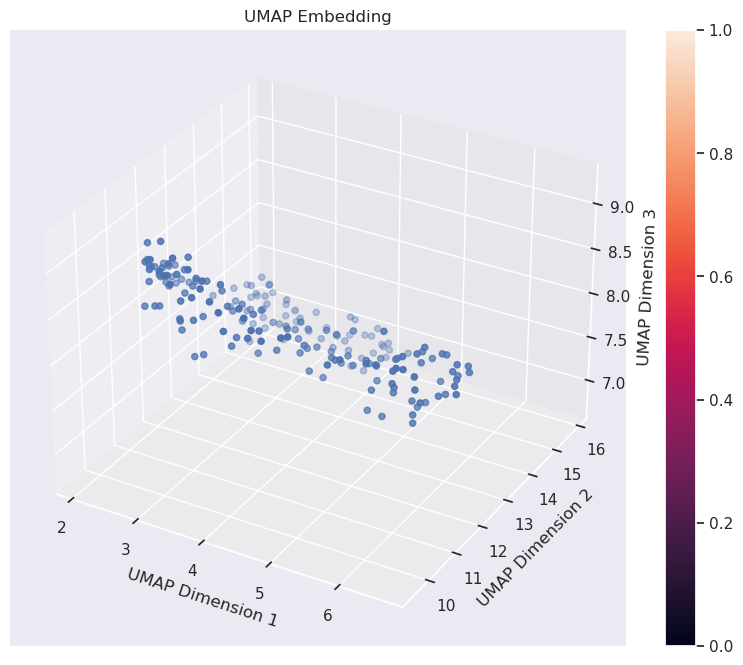

In [226]:
import seaborn as sns

# Create a 3D scatter plot
sns.set(style='darkgrid')
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding[:, 0],embedding[:, 1], embedding[:, 2], cmap='viridis')

# Add labels and title
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')
ax.set_title('UMAP Embedding')

# Add colorbar
plt.colorbar(scatter)

# Show the plot
plt.show()


In [227]:
# We save these results for our downstream analysis
umap_data=embedding

In [228]:
np.save('umap_data.npy', umap_data)

In [229]:
umap_data = np.load('umap_data.npy')

In [230]:
np.shape(umap_data)

(200, 3)

## Optimize PCA with cumulative variance 

In order to find the correct number of components to keep in our downstream analysis we will select he pca components that justify 95% of the variance of our data

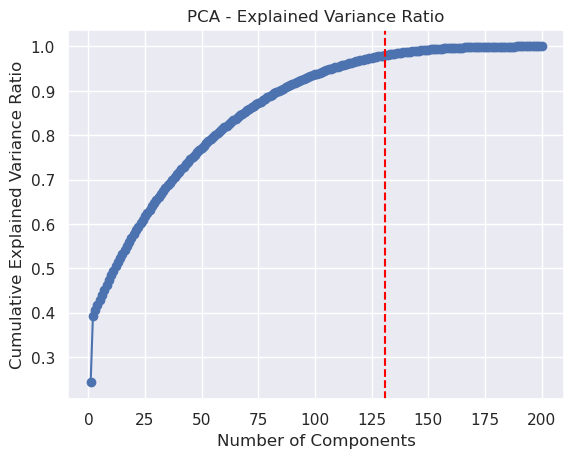

Selected number of components: 131


In [231]:
#selecting the correct number of component for PCA
pca = PCA( random_state=42)
pca_result = pca.fit_transform(scaled_data)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to capture 95% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.98) + 1

#or hardcode n_components and use trial and error 
#n_components=3

# Re-run PCA with the selected number of components
pca = PCA(n_components=n_components,random_state=42)
pca_result = pca.fit_transform(scaled_data)

# Plot the explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Explained Variance Ratio')
plt.axvline(x=n_components, color='red', linestyle='--')
plt.show()

# Print the selected number of components
print("Selected number of components:", n_components)

In [232]:
#we save the pca reduced data for further analysis
pca_data=pca_result

In [233]:
'''
np.save('pca_data.npy', pca_data)
pca_data = np.load('pca_data.npy')
np.shape(pca_data)
'''

"\nnp.save('pca_data.npy', pca_data)\npca_data = np.load('pca_data.npy')\nnp.shape(pca_data)\n"

## Optimize the hyperparameters for the GMM model using optuna for PCA data

In [234]:
import optuna
from sklearn.mixture import GaussianMixture

In [235]:
# Define the objective function for Optuna optimization
def objective(trial):
   
    
    # Define the number of components search space
    n_components = trial.suggest_int('n_components', 2, 10)
    
    # Define the covariance matrix type search space
    covariance_type = trial.suggest_categorical('covariance_type', ['full', 'tied', 'diag', 'spherical'])
    
    # Fit the GMM model
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type,random_state=42 )
    gmm.fit(pca_data)
    
    # Calculate the BIC score
    bic_score = gmm.bic(pca_data)
    
    return bic_score



In [236]:
# Create an Optuna study
study = optuna.create_study(direction='minimize')

# Optimize the GMM hyperparameters
study.optimize(objective, n_trials=100)

[I 2023-06-02 23:34:12,776] A new study created in memory with name: no-name-deaefdfe-98d1-45a5-b6ef-5721d4637c9f
[I 2023-06-02 23:34:12,894] Trial 0 finished with value: 53676.355752181815 and parameters: {'n_components': 5, 'covariance_type': 'full'}. Best is trial 0 with value: 53676.355752181815.
[I 2023-06-02 23:34:12,976] Trial 1 finished with value: 53676.355752181815 and parameters: {'n_components': 5, 'covariance_type': 'full'}. Best is trial 0 with value: 53676.355752181815.
[I 2023-06-02 23:34:13,002] Trial 2 finished with value: 75184.73521792737 and parameters: {'n_components': 7, 'covariance_type': 'diag'}. Best is trial 0 with value: 53676.355752181815.
[I 2023-06-02 23:34:13,117] Trial 3 finished with value: 84431.61424305849 and parameters: {'n_components': 6, 'covariance_type': 'full'}. Best is trial 0 with value: 53676.355752181815.
[I 2023-06-02 23:34:13,185] Trial 4 finished with value: 114811.51703879717 and parameters: {'n_components': 3, 'covariance_type': 'tied

[I 2023-06-02 23:34:15,864] Trial 43 finished with value: 74621.2739166801 and parameters: {'n_components': 2, 'covariance_type': 'full'}. Best is trial 13 with value: 26081.513580136845.
[I 2023-06-02 23:34:15,959] Trial 44 finished with value: 53676.355752181815 and parameters: {'n_components': 5, 'covariance_type': 'full'}. Best is trial 13 with value: 26081.513580136845.
[I 2023-06-02 23:34:16,024] Trial 45 finished with value: 79254.22279691728 and parameters: {'n_components': 3, 'covariance_type': 'spherical'}. Best is trial 13 with value: 26081.513580136845.
[I 2023-06-02 23:34:16,091] Trial 46 finished with value: 74621.2739166801 and parameters: {'n_components': 2, 'covariance_type': 'full'}. Best is trial 13 with value: 26081.513580136845.
[I 2023-06-02 23:34:16,158] Trial 47 finished with value: 26081.513580136845 and parameters: {'n_components': 3, 'covariance_type': 'full'}. Best is trial 13 with value: 26081.513580136845.
[I 2023-06-02 23:34:16,216] Trial 48 finished with

[I 2023-06-02 23:34:19,110] Trial 87 finished with value: 26081.513580136845 and parameters: {'n_components': 3, 'covariance_type': 'full'}. Best is trial 13 with value: 26081.513580136845.
[I 2023-06-02 23:34:19,175] Trial 88 finished with value: 26081.513580136845 and parameters: {'n_components': 3, 'covariance_type': 'full'}. Best is trial 13 with value: 26081.513580136845.
[I 2023-06-02 23:34:19,238] Trial 89 finished with value: 74621.2739166801 and parameters: {'n_components': 2, 'covariance_type': 'full'}. Best is trial 13 with value: 26081.513580136845.
[I 2023-06-02 23:34:19,297] Trial 90 finished with value: 115185.10132554211 and parameters: {'n_components': 4, 'covariance_type': 'tied'}. Best is trial 13 with value: 26081.513580136845.
[I 2023-06-02 23:34:19,360] Trial 91 finished with value: 26081.513580136845 and parameters: {'n_components': 3, 'covariance_type': 'full'}. Best is trial 13 with value: 26081.513580136845.
[I 2023-06-02 23:34:19,420] Trial 92 finished with v

In [237]:
# Get the best hyperparameters
pca_n_components = study.best_params['n_components']
pca_covariance_type = study.best_params['covariance_type']

# Fit the GMM with the best hyperparameters
pca_gmm = GaussianMixture(n_components=best_n_components, covariance_type=pca_covariance_type,random_state=42)
pcagmm=pca_gmm.fit(pca_data)

# Calculate the BIC score for the best model
pca_bic_score =pca_gmm.bic(pca_data)

# Get the posterior probabilities of each state for each cell
posterior_pca_probs = pca_gmm.predict_proba(pca_data)


cluster_pca_labels = pcagmm.predict(pca_data)

# Print the best hyperparameters and BIC score
print("Best number of components:", best_n_components)
print("Best covariance matrix type:", pca_covariance_type)
print("Best BIC score:", pca_bic_score)


Best number of components: 3
Best covariance matrix type: full
Best BIC score: 26081.513580136845


In [238]:
# Get the GMM means and covariances
gmm_pca_means = pca_gmm.means_
gmm_pca_covariances = pcagmm.covariances_

np.shape(gmm_pca_means)


(3, 131)

In [239]:
len(cluster_pca_labels)


200

In [240]:
np.shape(posterior_pca_probs)

(200, 3)

In [241]:
 #checking that all the probabilities add up to one
np.sum(posterior_pca_probs, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [242]:
#we observe that althouth the gmm model uses a soft clustering scheme, the clusters are well seperated indicating a good clustering approach
posterior_pca_probs

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1

In [243]:
cluster1_joint_posterior = np.prod(posterior_pca_probs[cluster_pca_labels == 0], axis=0)
cluster2_joint_posterior = np.prod(posterior_pca_probs[cluster_pca_labels == 1], axis=0)
cluster3_joint_posterior = np.prod(posterior_pca_probs[cluster_pca_labels == 2], axis=0)
#cluster4_joint_posterior = np.prod(posterior_pca_probs[cluster_pca_labels == 3], axis=0)


cell_joint_distributions=[cluster1_joint_posterior,cluster2_joint_posterior,cluster3_joint_posterior]

cell_joint_distributions

[array([1., 0., 0.]), array([0., 1., 0.]), array([0., 0., 1.])]

In [244]:
len(posterior_pca_probs[cluster_pca_labels == 0]),len(posterior_pca_probs[cluster_pca_labels == 1]),len(posterior_pca_probs[cluster_pca_labels == 2])

(64, 65, 71)

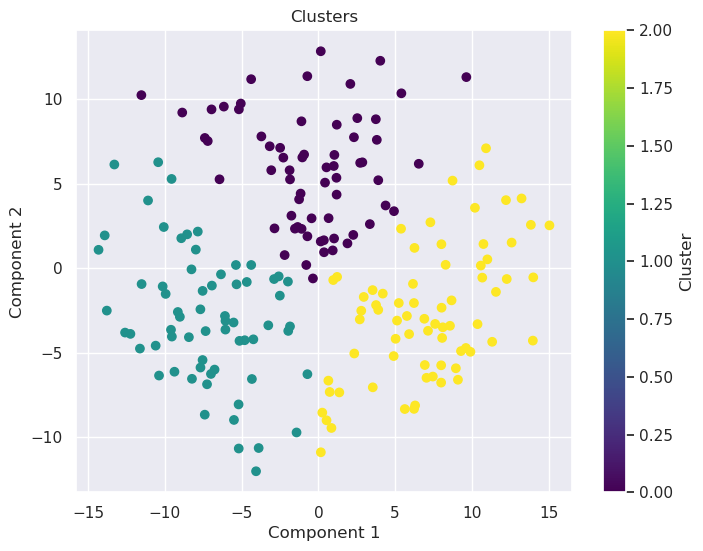

In [245]:
# Visualize Cluster Assignments (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_pca_labels, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clusters')
plt.colorbar(label='Cluster')
plt.show()

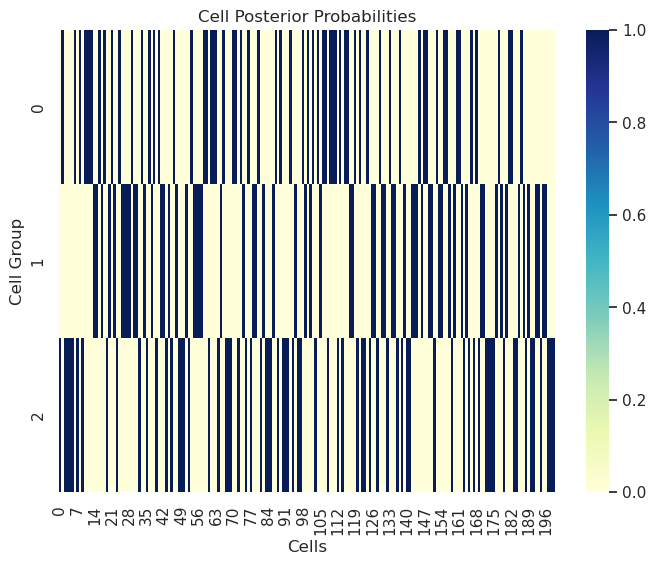

In [246]:
# Visualize Cell Posterior Probabilities (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(data=posterior_pca_probs.T, cmap='YlGnBu', cbar=True)
plt.xlabel('Cells')
plt.ylabel('Cell Group')
plt.title('Cell Posterior Probabilities')
plt.show()

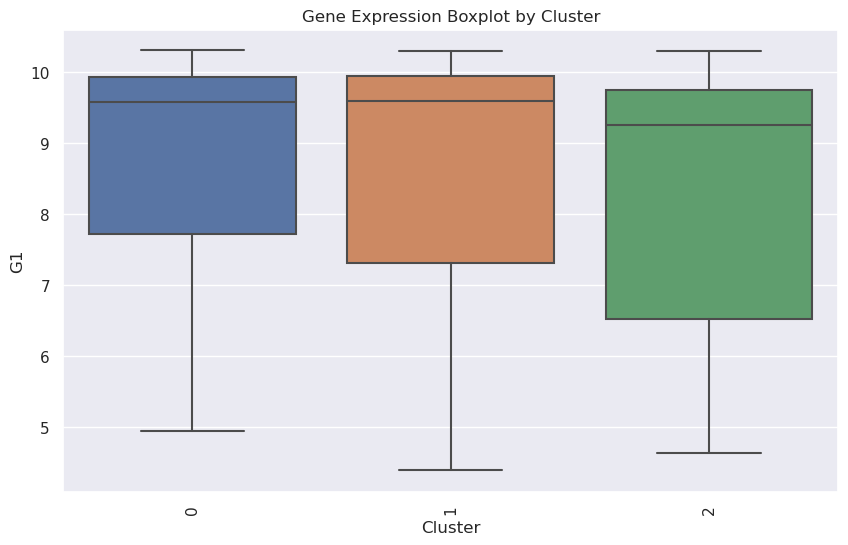

In [247]:
# Create a DataFrame with gene expression and cluster assignments
gene_expression_cluster = pd.concat([pd.Series(cells, name='Cell'), pd.Series(cluster_pca_labels, name='Cluster'), pd.DataFrame(expressions.T, columns=genes)], axis=1)

# Plot the gene expression boxplot by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=gene_expression_cluster, x='Cluster', y='G1', showfliers=False)
plt.xlabel('Cluster')
plt.ylabel('G1')
plt.title('Gene Expression Boxplot by Cluster')
plt.xticks(rotation=90)
plt.show()

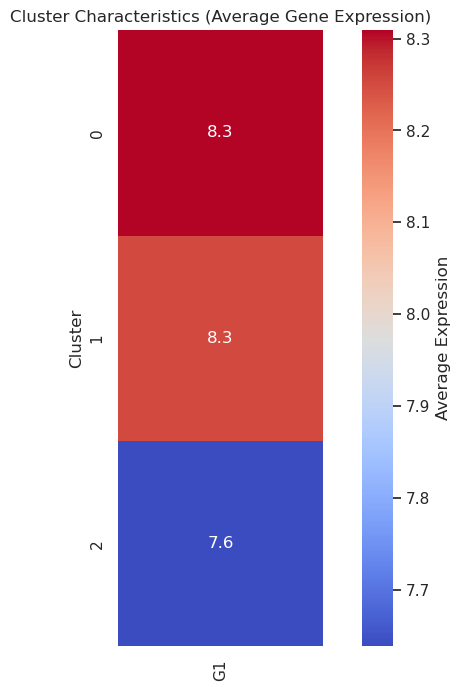

In [248]:
# Calculate the average gene expression by cluster
cluster_average_expression = gene_expression_cluster.groupby('Cluster')["G1"].mean().T

# Convert cluster_average_expression to a DataFrame
cluster_average_expression = pd.DataFrame(cluster_average_expression)

# Plot the cluster characteristics heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=cluster_average_expression, cmap='coolwarm', cbar_kws={'label': 'Average Expression'},annot=True, square=True)
#plt.xlabel('Cluster')
plt.ylabel('Cluster')
plt.title('Cluster Characteristics (Average Gene Expression)')
plt.xticks(rotation=90)
plt.show()


## Optimize the hyperparameters for the GMM model using optuna for UMAP data

In [249]:
# Define the objective function for Optuna optimization
def objective(trial):
   
    
    # Define the number of components search space
    n_components = trial.suggest_int('n_components', 2, 10)
    
    # Define the covariance matrix type search space
    covariance_type = trial.suggest_categorical('covariance_type', ['full', 'tied', 'diag', 'spherical'])
    
    # Fit the GMM model
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gmm.fit(umap_data)
    
    # Calculate the BIC score
    bic_score = gmm.bic(umap_data)
    
    return bic_score

# Create an Optuna study
study = optuna.create_study(direction='minimize')

# Optimize the GMM hyperparameters
study.optimize(objective, n_trials=100)

[I 2023-06-02 23:34:21,292] A new study created in memory with name: no-name-5866941d-5dde-4ae5-bf2e-db7a02103f73
[I 2023-06-02 23:34:21,306] Trial 0 finished with value: 1324.1141028146992 and parameters: {'n_components': 5, 'covariance_type': 'tied'}. Best is trial 0 with value: 1324.1141028146992.
[I 2023-06-02 23:34:21,341] Trial 1 finished with value: 1387.801448131397 and parameters: {'n_components': 9, 'covariance_type': 'full'}. Best is trial 0 with value: 1324.1141028146992.
[I 2023-06-02 23:34:21,355] Trial 2 finished with value: 1301.804329859341 and parameters: {'n_components': 6, 'covariance_type': 'tied'}. Best is trial 2 with value: 1301.804329859341.
[I 2023-06-02 23:34:21,370] Trial 3 finished with value: 1340.4754761171819 and parameters: {'n_components': 6, 'covariance_type': 'full'}. Best is trial 2 with value: 1301.804329859341.
[I 2023-06-02 23:34:21,383] Trial 4 finished with value: 1431.798189957494 and parameters: {'n_components': 8, 'covariance_type': 'spheric

[I 2023-06-02 23:34:22,204] Trial 43 finished with value: 1313.19566711713 and parameters: {'n_components': 9, 'covariance_type': 'tied'}. Best is trial 13 with value: 1276.9259770170231.
[I 2023-06-02 23:34:22,225] Trial 44 finished with value: 1321.8110619620556 and parameters: {'n_components': 10, 'covariance_type': 'tied'}. Best is trial 13 with value: 1276.9259770170231.
[I 2023-06-02 23:34:22,244] Trial 45 finished with value: 1423.2478972894735 and parameters: {'n_components': 8, 'covariance_type': 'spherical'}. Best is trial 13 with value: 1276.9259770170231.
[I 2023-06-02 23:34:22,268] Trial 46 finished with value: 1294.151185383124 and parameters: {'n_components': 9, 'covariance_type': 'tied'}. Best is trial 13 with value: 1276.9259770170231.
[I 2023-06-02 23:34:22,289] Trial 47 finished with value: 1365.2717176721294 and parameters: {'n_components': 10, 'covariance_type': 'diag'}. Best is trial 13 with value: 1276.9259770170231.
[I 2023-06-02 23:34:22,314] Trial 48 finished 

[I 2023-06-02 23:34:23,203] Trial 86 finished with value: 1292.2971916196236 and parameters: {'n_components': 10, 'covariance_type': 'tied'}. Best is trial 13 with value: 1276.9259770170231.
[I 2023-06-02 23:34:23,236] Trial 87 finished with value: 1413.9426131542755 and parameters: {'n_components': 10, 'covariance_type': 'full'}. Best is trial 13 with value: 1276.9259770170231.
[I 2023-06-02 23:34:23,255] Trial 88 finished with value: 1297.5889733558977 and parameters: {'n_components': 9, 'covariance_type': 'tied'}. Best is trial 13 with value: 1276.9259770170231.
[I 2023-06-02 23:34:23,277] Trial 89 finished with value: 1279.0706765504199 and parameters: {'n_components': 10, 'covariance_type': 'tied'}. Best is trial 13 with value: 1276.9259770170231.
[I 2023-06-02 23:34:23,296] Trial 90 finished with value: 1315.0789093511078 and parameters: {'n_components': 5, 'covariance_type': 'tied'}. Best is trial 13 with value: 1276.9259770170231.
[I 2023-06-02 23:34:23,323] Trial 91 finished w

In [250]:
# Get the GMM means and covariances
gmm_umap_means = umap_gmm.means_
gmm_umap_covariances = umap_gmm.covariances_

np.shape(gmm_umap_means)

(3, 4)

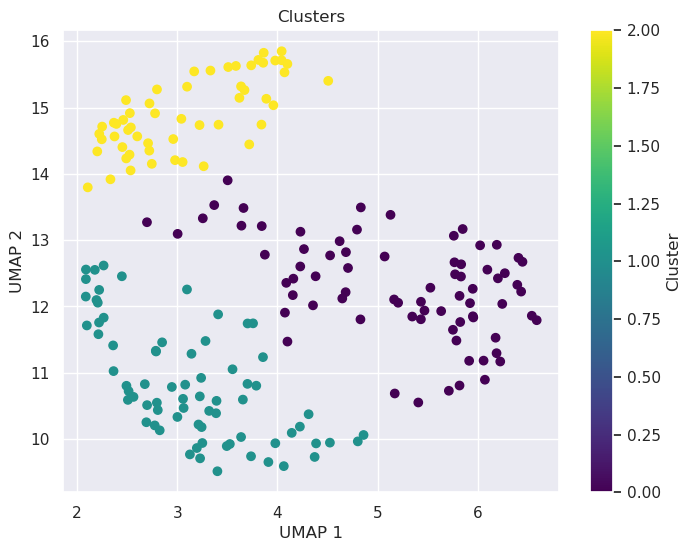

In [251]:
# Visualize Cluster Assignments (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(umap_data[:, 0], umap_data[:, 1], c=cluster_umap_labels, cmap='viridis')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [252]:
 #checking that all the probabilities add up to one
np.sum(posterior_umap_probs, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [253]:
#we observe that because we have ahard clustering sceme the posterior of each cell to belong to a cluster is either 1 or 0
posterior_umap_probs

array([[2.92001081e-02, 4.47652215e-08, 9.70799847e-01],
       [9.99999984e-01, 1.56442881e-08, 2.11726741e-38],
       [3.07832639e-10, 1.62980162e-19, 1.00000000e+00],
       [1.62535478e-01, 3.84364999e-03, 8.33620872e-01],
       [6.68434352e-04, 3.65374059e-10, 9.99331565e-01],
       [1.25830269e-08, 6.77894745e-21, 9.99999987e-01],
       [9.99999999e-01, 1.05118763e-09, 2.86393587e-55],
       [7.66984945e-04, 9.99233015e-01, 1.02224006e-14],
       [9.99999146e-01, 8.54216956e-07, 8.56389982e-64],
       [3.41572480e-07, 2.02351387e-15, 9.99999658e-01],
       [1.00000000e+00, 1.42128853e-10, 8.39413683e-31],
       [9.99878332e-01, 1.21667567e-04, 6.85087629e-26],
       [9.98937200e-01, 1.06279957e-03, 2.80961511e-14],
       [9.99905267e-01, 9.47327493e-05, 1.19447144e-68],
       [3.05662853e-06, 9.99996943e-01, 1.15880812e-50],
       [6.41987336e-05, 9.99935801e-01, 3.49501686e-46],
       [9.99999995e-01, 4.51224550e-09, 1.68747564e-48],
       [2.38003500e-06, 9.99997

In [254]:
cluster1_joint_posterior = np.prod(posterior_umap_probs[cluster_umap_labels == 0], axis=0)
cluster2_joint_posterior = np.prod(posterior_umap_probs[cluster_umap_labels == 1], axis=0)
cluster3_joint_posterior = np.prod(posterior_umap_probs[cluster_umap_labels == 2], axis=0)
#cluster4_joint_posterior = np.prod(posterior_pca_probs[cluster_umap_labels == 3], axis=0)


cell_joint_distributions=[cluster1_joint_posterior,cluster2_joint_posterior,cluster3_joint_posterior]

cell_joint_distributions

[array([0.42083402, 0.        , 0.        ]),
 array([2.43329525e-313, 3.76986293e-001, 0.00000000e+000]),
 array([4.09003532e-235, 0.00000000e+000, 1.80632017e-001])]

In [255]:
# Get the GMM means and covariances
gmm_pca_means = pca_gmm.means_
gmm_pca_covariances = pca_gmm.covariances_

np.shape(gmm_pca_means)


(3, 131)

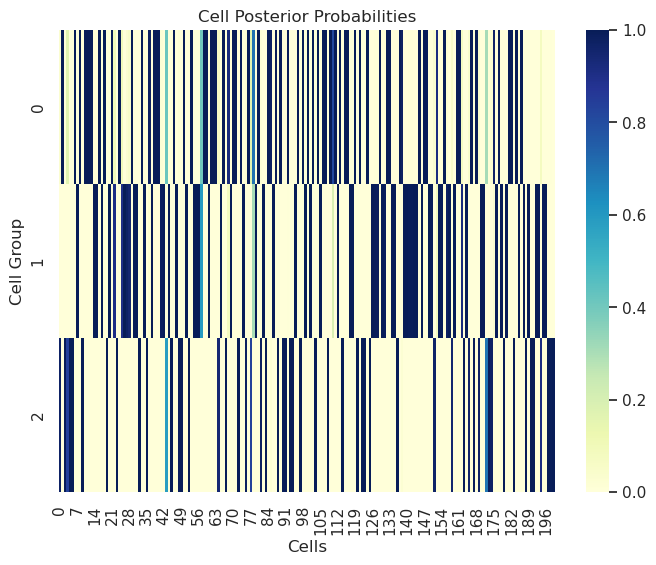

In [256]:
# Visualize Cell Posterior Probabilities (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(data=posterior_umap_probs.T, cmap='YlGnBu', cbar=True)
plt.xlabel('Cells')
plt.ylabel('Cell Group')
plt.title('Cell Posterior Probabilities')
plt.show()

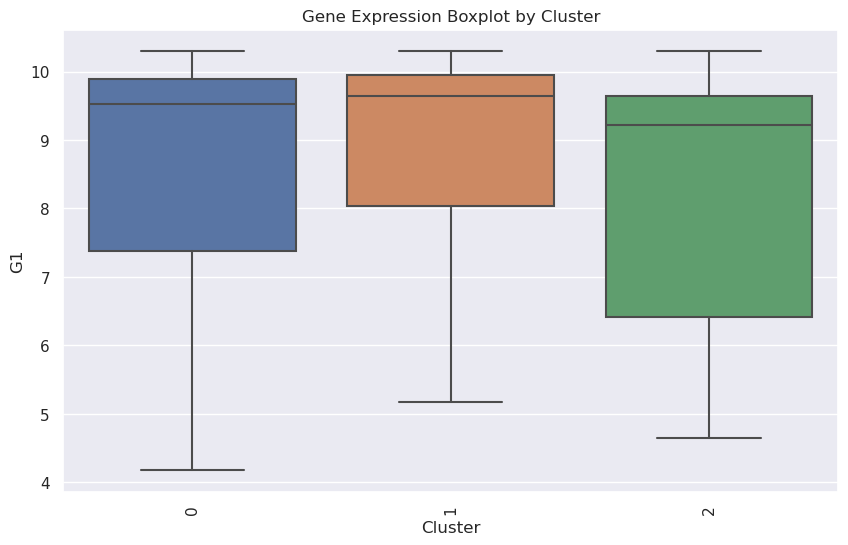

In [257]:
# Create a DataFrame with gene expression and cluster assignments
gene_expression_cluster = pd.concat([pd.Series(cells, name='Cell'), pd.Series(cluster_umap_labels, name='Cluster'), pd.DataFrame(expressions.T, columns=genes)], axis=1)

# Plot the gene expression boxplot by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=gene_expression_cluster, x='Cluster', y='G1', showfliers=False)
plt.xlabel('Cluster')
plt.ylabel('G1')
plt.title('Gene Expression Boxplot by Cluster')
plt.xticks(rotation=90)
plt.show()

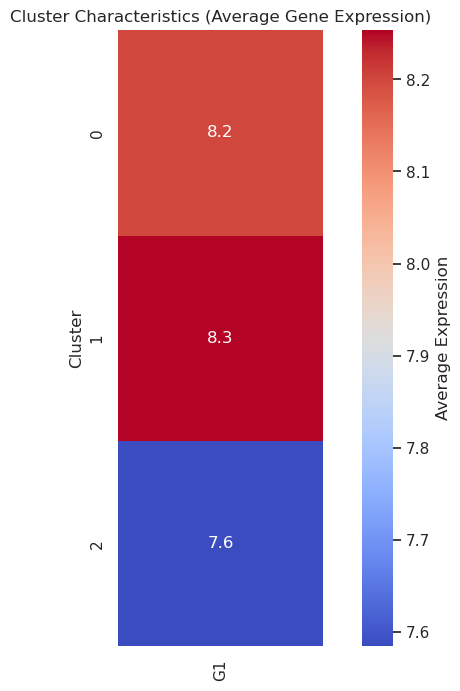

In [258]:
# Calculate the average gene expression by cluster
cluster_average_expression = gene_expression_cluster.groupby('Cluster')["G1"].mean().T

# Convert cluster_average_expression to a DataFrame
cluster_average_expression = pd.DataFrame(cluster_average_expression)

# Plot the cluster characteristics heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=cluster_average_expression, cmap='coolwarm', cbar_kws={'label': 'Average Expression'},annot=True, square=True)
#plt.xlabel('Cluster')
plt.ylabel('Cluster')
plt.title('Cluster Characteristics (Average Gene Expression)')
plt.xticks(rotation=90)
plt.show()
